# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fauzi Ferdiansyah
- **Email:** fauziferdiansyahindo@gmail.com
- **ID Dicoding:** fauziferdiansyah

## Menentukan Pertanyaan Bisnis

- Pada musim apa kita melihat lonjakan permintaan penyewaan sepeda?
- Pada bulan apa yang menjadi puncak penyewaan sepeda?
- Apakah ada perbedaan jumlah penyewaan di pagi hari, sore hari dan malam hari ?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- kedua data berhasil dimuat ke dataframe hour_df dan day_df

### Assessing Data

#### Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi data day: ", day_df.duplicated().sum())

Jumlah duplikasi data day:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Tabel hour_

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi data day: ", hour_df.duplicated().sum())

Jumlah duplikasi data day:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada kedua data tersebut tidak ditemukan data null pada kedua file, selanjutnya juga tidak ada duplicate data
- pada kedua data teridentifikasi pada kolom dteday bertipe objek seharusnya dateset
- beberapa kolom memiliki isian nomor dengan tipe int akan lebih baik dilakukan perubahan type ke kategorikal dan diubah
  untuk kode nomer menjadi arti dari kode nomer tersebut

### Cleaning Data

#### Pembersihan data day_df

##### Memperbaiki tipe data dteday day_df

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
##### Mengubah kolom menjadi kategorikal day_df

In [16]:
day_df['season'] = pd.Categorical(day_df['season'], categories=[1, 2, 3, 4], ordered=True)
day_df['yr'] = pd.Categorical(day_df['yr'], categories=[0, 1], ordered=True)
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=list(range(1, 13)), ordered=True)
day_df['holiday'] = pd.Categorical(day_df['holiday'], categories=[0, 1])
day_df['weekday'] = pd.Categorical(day_df['weekday'], categories=list(range(7)))
day_df['weathersit'] = pd.Categorical(day_df['weathersit'], categories=[1, 2, 3, 4])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

##### Pemetaan Data Kategorikal day_df

In [18]:
#data isian ketegorikal
labelSeason = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
labelYear = {0: '2011', 1: '2012'}
labelMonth = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
labelHoliday = {0: 'No', 1: 'Yes'}
labelDay = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
labelWeater = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

In [19]:
day_df['season'] = day_df['season'].map(labelSeason)
day_df['yr'] = day_df['yr'].map(labelYear)
day_df['mnth'] = day_df['mnth'].map(labelMonth)
day_df['holiday'] = day_df['holiday'].map(labelHoliday)
day_df['weekday'] = day_df['weekday'].map(labelDay)
day_df['weathersit'] = day_df['weathersit'].map(labelWeater)

In [20]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No,Sat,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Pembersihan data hour_df

##### Memperbaiki tipe data dteday hour_df

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
hour_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Mengubah kolom menjadi kategorikal

In [25]:
hour_df['season'] = pd.Categorical(hour_df['season'], categories=[1, 2, 3, 4], ordered=True)
hour_df['yr'] = pd.Categorical(hour_df['yr'], categories=[0, 1], ordered=True)
hour_df['mnth'] = pd.Categorical(hour_df['mnth'], categories=list(range(1, 13)), ordered=True)
hour_df['holiday'] = pd.Categorical(hour_df['holiday'], categories=[0, 1])
hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=list(range(7)))
hour_df['weathersit'] = pd.Categorical(hour_df['weathersit'], categories=[1, 2, 3, 4])

In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Pemetaan Data Kategorikal hour_df 

In [27]:
hour_df['season'] = hour_df['season'].map(labelSeason)
hour_df['yr'] = hour_df['yr'].map(labelYear)
hour_df['mnth'] = hour_df['mnth'].map(labelMonth)
hour_df['holiday'] = hour_df['holiday'].map(labelHoliday)
hour_df['weekday'] = hour_df['weekday'].map(labelDay)
hour_df['weathersit'] = hour_df['weathersit'].map(labelWeater)

In [28]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,Spring,2011,Jan,1,No,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,Spring,2011,Jan,2,No,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,Spring,2011,Jan,3,No,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,Spring,2011,Jan,4,No,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- pada kedua data sudah dilakuakan perubahan tipe dataset pada kolom dteday, hal ini penting untuk analisis
  berbasis waktu dan memungkinkan operasi seperti filtering dan agregasi berdasarkan tanggal.
- Beberapa kolom di kedua dataset telah diubah menjadi tipe data kategorikal dan nilai-nilai numeriknya telah dipetakan
  ke label teks yang lebih deskriptif.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [29]:
day_df.sample(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
644,645,2012-10-06,Winter,2012,Oct,No,Sat,0,Clear,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
413,414,2012-02-18,Spring,2012,Feb,No,Sat,0,Clear,0.346667,0.355425,0.534583,0.190929,1435,2883,4318
264,265,2011-09-22,Fall,2011,Sep,No,Thu,1,Cloudy,0.628333,0.554963,0.902083,0.128125,555,4240,4795
160,161,2011-06-10,Summer,2011,Jun,No,Fri,1,Clear,0.755000,0.703292,0.605000,0.140554,815,3771,4586
687,688,2012-11-18,Winter,2012,Nov,No,Sun,0,Clear,0.342500,0.337746,0.692917,0.227612,922,3747,4669
521,522,2012-06-05,Summer,2012,Jun,No,Tue,1,Cloudy,0.540833,0.525892,0.613333,0.209575,968,6033,7001


In [30]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,No,Sun,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
day_df.instant.is_unique

True

<Axes: >

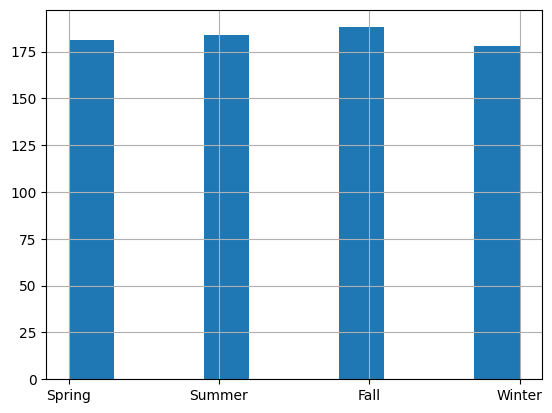

In [32]:
day_df.season.hist()

<Axes: >

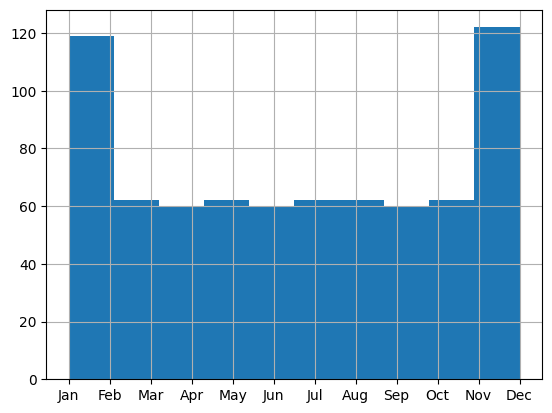

In [33]:
day_df.mnth.hist()

#### Mencari Jawaban Pada musim apa kita melihat lonjakan permintaan penyewaan sepeda?

In [34]:
day_df.groupby('season', observed=True)['cnt'].sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

In [35]:
day_df.groupby('season', observed=True).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


#### Mencari Jawaban Pada bulan apa yang menjadi puncak penyewaan sepeda?

In [36]:
day_df.groupby('mnth', observed=True)['cnt'].sum().sort_values(ascending=False)

mnth
Aug    351194
Jun    346342
Sep    345991
Jul    344948
May    331686
Oct    322352
Apr    269094
Nov    254831
Mar    228920
Dec    211036
Feb    151352
Jan    134933
Name: cnt, dtype: int64

In [37]:
day_df.groupby('mnth', observed=True).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
mnth,
Aug,351194
Jun,346342
Sep,345991
Jul,344948
May,331686
Oct,322352
Apr,269094
Nov,254831
Mar,228920


### Explore hour_df

In [38]:
hour_df.sample(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16677,16678,NaT,Winter,2012,Dec,16,No,Sun,0,Cloudy,0.44,0.4394,0.67,0.1045,85,358,443
6255,6256,NaT,Winter,2011,Sep,5,No,Fri,1,Cloudy,0.62,0.5455,0.94,0.0000,2,20,22
10537,10538,NaT,Spring,2012,Mar,4,No,Tue,1,Cloudy,0.52,0.5000,0.88,0.1343,0,6,6
5440,5441,NaT,Fall,2011,Aug,14,No,Fri,1,Clear,0.78,0.7273,0.55,0.1940,78,142,220
12980,12981,NaT,Fall,2012,Jun,1,No,Sat,0,Light Rain/Snow,0.64,0.5758,0.89,0.2239,3,55,58
12777,12778,NaT,Fall,2012,Jun,14,No,Thu,1,Clear,0.88,0.7879,0.37,0.1642,27,149,176


In [39]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379,17379,17379,17379.000000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,No,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-01 00:00:00,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-02 12:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-01 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-01 12:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [40]:
hour_df.instant.is_unique

True

<Axes: >

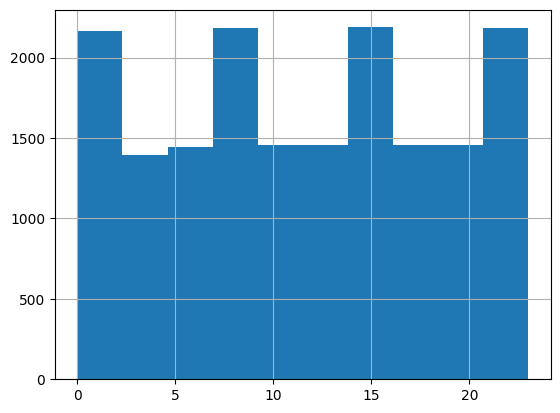

In [41]:
hour_df.hr.hist()

#### Memcari Jawaban Apakah ada perbedaan jumlah penyewaan di pagi hari, sore hari dan malam hari ?

In [42]:
# Definisikan batasan waktu untuk pagi, sore, dan malam hari
def time_period(hour):
    if 6 <= hour <= 10:
        return "Pagi"
    elif 11 <= hour <= 17:
        return "Sore"
    else:
        return "Malam"

In [43]:
hour_df['period'] = hour_df['hr'].apply(time_period)

In [44]:
hour_df.groupby('period', observed=True)['cnt'].mean().sort_values(ascending=False)

period
Sore     283.038416
Pagi     208.092210
Malam    126.401897
Name: cnt, dtype: float64

In [45]:
hour_df.groupby('period', observed=True).agg({
    "cnt": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt
period,
Sore,283.038416
Pagi,208.092210
Malam,126.401897


## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Pada musim apa kita melihat lonjakan permintaan penyewaan sepeda?

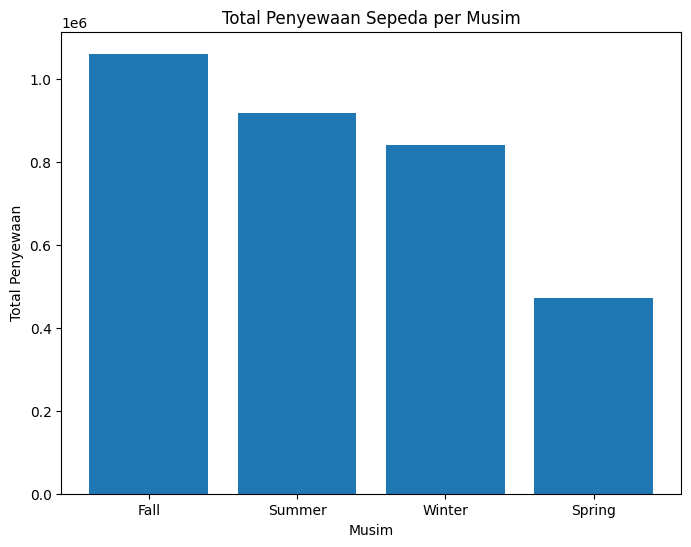

In [46]:
seasonal_demand = day_df.groupby('season', observed=True)['cnt'].sum().sort_values(ascending=False)

# Buat grafik batang
plt.figure(figsize=(8, 6))
plt.bar(seasonal_demand.index, seasonal_demand.values)
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim') 
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 2:

#### Pada bulan apa yang menjadi puncak penyewaan sepeda?

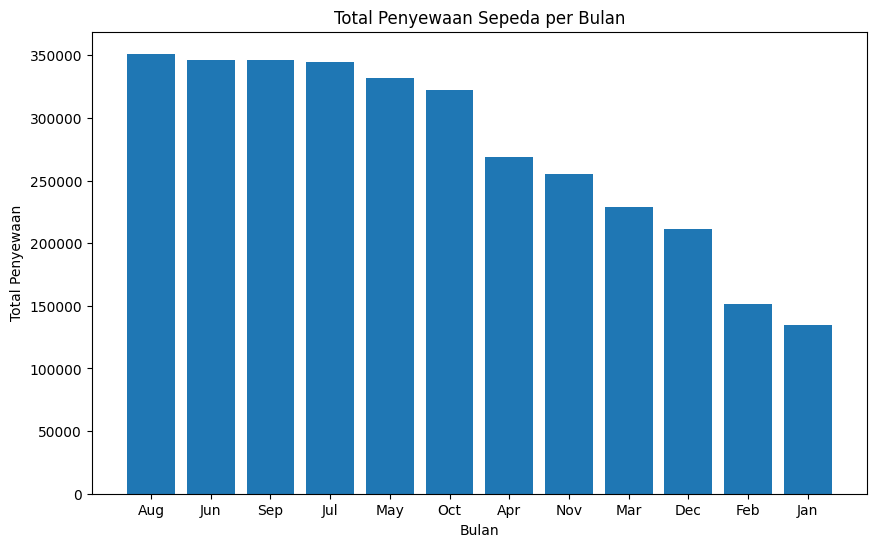

In [47]:
# Hitung total penyewaan sepeda per bulan
monthly_demand = day_df.groupby('mnth', observed=True)['cnt'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(monthly_demand.index, monthly_demand.values)
plt.title('Total Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 3:

#### Apakah ada perbedaan jumlah penyewaan di pagi hari, sore hari dan malam hari ?

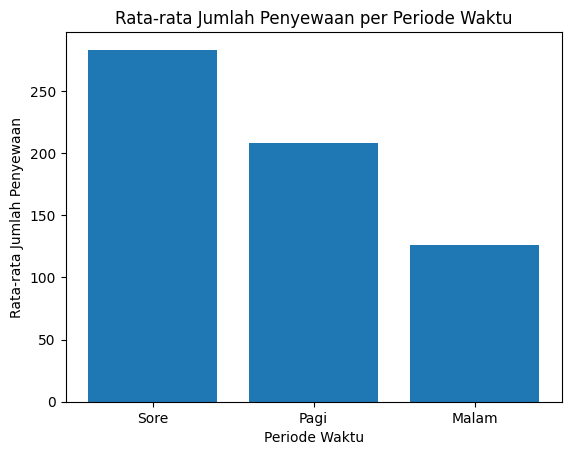

In [48]:
average_rentals_by_period = hour_df.groupby('period', observed=True)['cnt'].mean().sort_values(ascending=False)
plt.bar(average_rentals_by_period.index, average_rentals_by_period.values)
plt.title('Rata-rata Jumlah Penyewaan per Periode Waktu')
plt.xlabel('Periode Waktu')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

**Insight:**
- Pada pertanyaan pertama grafik batang menunjukkan bahwa musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas
  (Summer), musim dingin (Winter) dan terakhir Musim Semi (Spring) memiliki jumlah penyewaan terendah.
- Pada pertanyaan kedua grafik batang menunjukkan bahwa bulan Agustus memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh bulan Juni dan September.
  Bulan Februari dan Januari memiliki jumlah penyewaan terendah.
- Pada pertanyaan ketiga grafik batang menunjukkan bahwa sore hari memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh malam hari dan pagi hari.

## Import Data

In [49]:
day_df.to_csv("day_final.csv", index=False)
hour_df.to_csv("hour_final.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 :
  Pada grafik batang menunjukkan bahwa musim gugur memiliki jumlah penyewaan tertinggi, maka dapat disimpulkan bahwa lonjakan permintaan penyewaan
  sepeda terjadi pada musim gugur.
- Conclution pertanyaan 2 :
  Pada grafik batang menunjukkan bahwa bulan Agustus memiliki jumlah penyewaan tertinggi, maka dapat disimpulkan bahwa puncak penyewaan sepeda terjadi
  pada bulan Agustus.
- Conclution pertanyaan 2 :
  Pada grafik garis menunjukkan bahwa sore hari memiliki jumlah penyewaan tertinggi, maka dapat disimpulkan bahwa terdapat perbedaan jumlah penyewaan di
  pagi, sore, dan malam hari, dengan sore hari memiliki jumlah penyewaan tertinggi.